In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

The differential equation that describes the problem of paying off a mortgage is 
$$\frac{dB}{dt} - \alpha B = -r $$
where $B$ is the balanace of the mortgage at time $t$, $\alpha$ is the interest rate on the mortgage, and $r$ is the repayments per unit time. We will use a month as the unit amount of time.
This mortgage will be governed by the conditions that at $t=0$, $B(0) = B_0$, and at the endpoint of the mortgage $T$, $B(T) = 0$.


Solving this differential equation for the initial conditions, and constant $\alpha$ and $r$ we find that 
$$r = \frac{\alpha B_0e^{\alpha T}}{e^{\alpha T}-1},$$
or 
$$r = \frac{\alpha B_0}{1-e^{-\alpha T}},$$
and 
$$B(t) = B_0e^{\alpha t} - \frac{B_0 e^{\alpha T}}{1-e^{\alpha T}}\left(1 - e^{\alpha t}\right).$$

However, if we consider the problem for a variable interest rate, then $\alpha$ becomes a function of time $\alpha(t)$, and so too do the repayments per unit time $r$ vary with time and become $r(t)$. Solving this considering these functions we get
$$r(t) = \frac{B_0}{T}e^{\int_0^t\alpha(v)dv},$$
and 
$$B(t) = e^{\int_0^t\alpha(v)dv}\left(B_0 - \int_0^t\frac{B_0}{T}ds\right).$$

### Fixed interest rate

In [10]:
class FixedRateMortgage:
    def __init__(self, B_0, T, alpha):
        self.B_0 = B_0
        self.T = T
        self.alpha = alpha

    def r(self):
        return (self.alpha * self.B_0)/(1-np.exp(-self.alpha*self.T))

    def B(self, t):
        return self.B_0 * np.exp(self.alpha * t) - (self.B_0 * np.exp(self.alpha * self.T))/(1 - np.exp(self.alpha * self.T)) * (1 - np.exp(self.alpha * t))

In [11]:
alpha = 0.05/12 # monthly interest rate
B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

first_fixed_mortgage = FixedRateMortgage(B_0, T, alpha)
print(first_fixed_mortgage.r())
print(first_fixed_mortgage.B(0))
print(first_fixed_mortgage.B(T))
print(first_fixed_mortgage.B(150))

700.7755592465065
120000.0
0.0
78162.58375992652


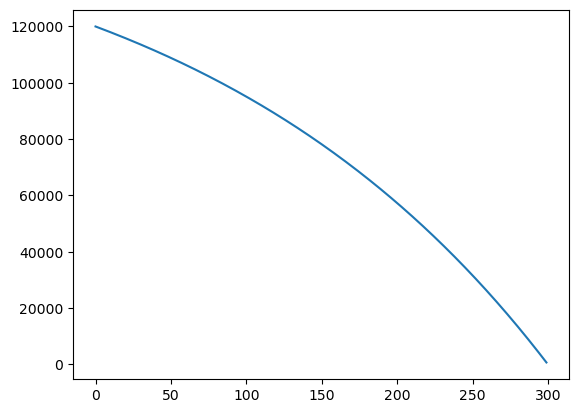

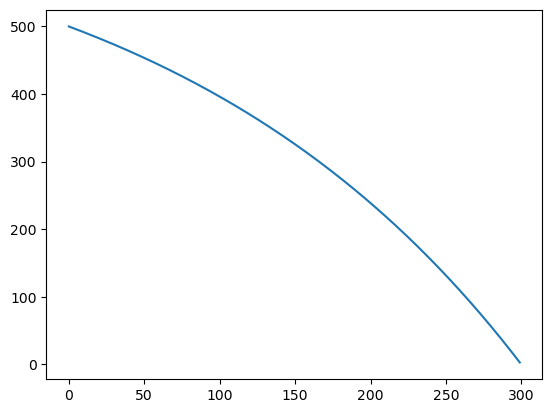

In [13]:
r_list = []
B_list = []
interest_added_list = []
for t in range(T):
    r_list.append(first_fixed_mortgage.r())
    B_list.append(first_fixed_mortgage.B(t))
    interest_added_list.append(B_list[t]*alpha)

plt.plot(B_list)
plt.figure()
plt.plot(interest_added_list)

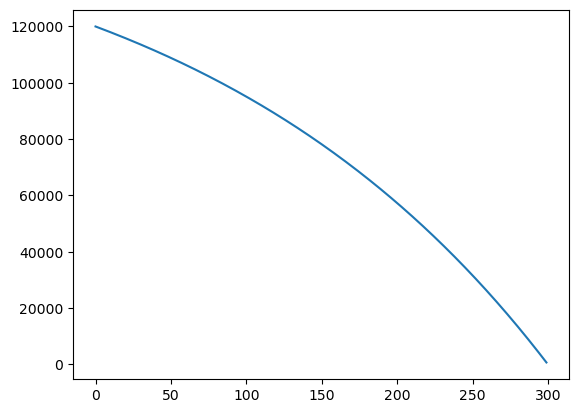

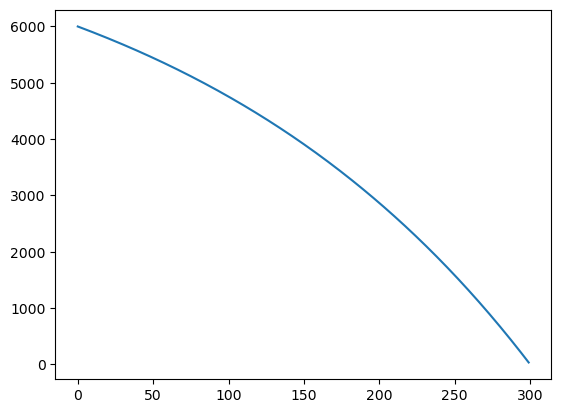

In [129]:
alpha = 0.05 # monthly interest rate
B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months
r_list = []
B_list = []
interest_added_list = []
for t in range(T):
    r_list.append(first_fixed_mortgage.r())
    B_list.append(first_fixed_mortgage.B(t))
    interest_added_list.append(B_list[t]*alpha)

plt.plot(B_list)
plt.figure()
plt.plot(interest_added_list)

### Variable interest rate

In [104]:
class VariableRateMortgage:
    def __init__(self, B_0, T, alpha):
        self.B_0 = B_0
        self.T = T
        self.alpha = alpha

    def alpha_integrated(self, t):
        """Numerically evaluate the function for the interest rate between 0 and given t using scipy.integrate.quad"""
        if t == 0: return 0 # Evaluating between 0 and 0 will give 0 anyway, so avoids dealing with functions that behave badly at 0
        return integrate.quad(self.alpha, 0, t)[0]

    def alpha_integrated_error(self, t):
        """For investigation of the numerical error of the numerical integration of interest rate"""
        if t == 0: return 0 # Evaluating between 0 and 0 will give 0 anyway, so avoids dealing with functions that behave badly at 0
        return integrate.quad(self.alpha, 0, t)[1]

    def r(self, t):
        return (self.B_0 / self.T) * np.exp(self.alpha_integrated(t))

    def r_reflected(self, t):
         return (self.B_0 / self.T) * np.exp(self.alpha_integrated(T-t))

    def B(self, t):
        return np.exp(self.alpha_integrated(t)) * (self.B_0 - integrate.quad(lambda s: self.B_0/self.T, 0, t)[0])

    # Using B(T) = 0 in definite integrals
    def alpha_integrated_alternative(self, t):
        """Numerically evaluate the function for the interest rate between 0 and given t using scipy.integrate.quad"""
        if t == T: return 0 # Evaluating between T and T will give 0 anyway, so avoids dealing with functions that behave badly at T
        return integrate.quad(self.alpha, t, self.T)[0]

    def r_alternative(self, t):
        return (self.B_0 / self.T) * np.exp(self.alpha_integrated_alternative(0) - self.alpha_integrated_alternative(t))

    def B_alternative(self, t):
         return np.exp(-self.alpha_integrated_alternative(t)) * integrate.quad(lambda s: (self.B_0/self.T) * np.exp(self.alpha_integrated_alternative(0)), t, self.T)[0]

In [105]:
alpha = lambda t: 0.0005*t/12 # monthly interest rate
B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

first_variable_mortgage = VariableRateMortgage(B_0, T, alpha)
print(first_variable_mortgage.r(0))
print(first_variable_mortgage.B(0))
print(first_variable_mortgage.r(T))
print(first_variable_mortgage.B(T))
print(first_variable_mortgage.r(150))
print(first_variable_mortgage.B(150))

400.0
120000.0
2608.327648132046
0.0
639.1981799802534
95879.72699703801


In [106]:
m = first_variable_mortgage
print(m.alpha_integrated(1))
print(m.alpha_integrated(-1))

2.0833333333333333e-05
2.0833333333333333e-05


In [107]:
first_variable_mortgage.r_reflected(1)

2575.9801474036744

In [98]:
r_reversed = r_list.reverse()

264612.0898066871
264612.08980668715
266820.4174548193


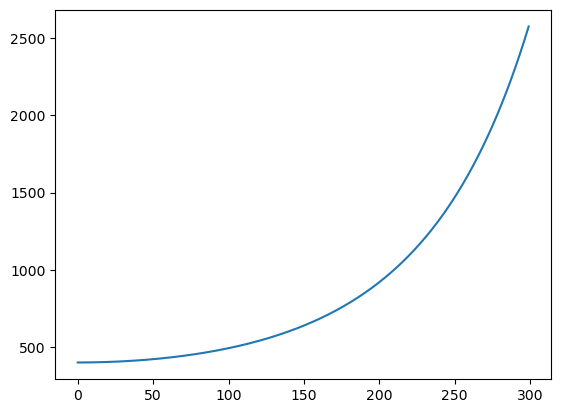

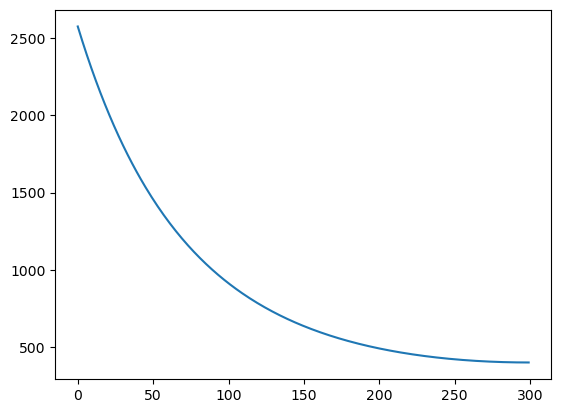

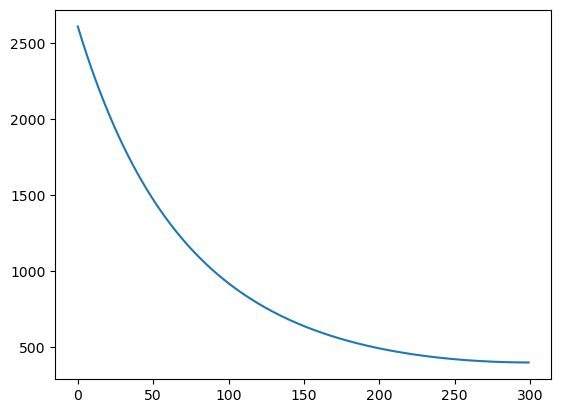

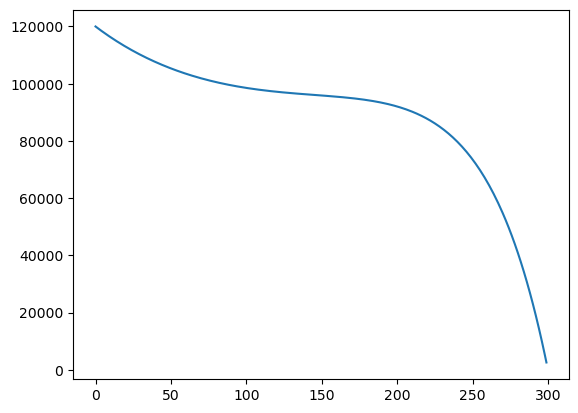

In [108]:
r_list = []
r_alt_list = []
r_reflected_list = []
B_list = []
B_alt_list = []
interest_added_list = []
for t in range(T):
    r_list.append(first_variable_mortgage.r(t))
    r_alt_list.append(first_variable_mortgage.r_alternative(t))
    r_reflected_list.append(first_variable_mortgage.r_reflected(t))
    B_list.append(first_variable_mortgage.B(t))
    B_alt_list.append(first_variable_mortgage.B_alternative(t))
    interest_added_list.append(B_list[t]*alpha(t))

plt.plot(np.array(r_list))
plt.figure()
plt.plot(list(reversed(r_list)))
plt.figure()
# plt.plot(r_alt_list)
# plt.figure()
plt.plot(r_reflected_list)
plt.figure()
plt.plot(B_list)
# plt.figure()
# plt.plot(B_alt_list)
# plt.figure()
# plt.plot(interest_added_list)

print(sum(r_list))
print(sum(r_alt_list))
print(sum(r_reflected_list))

C:\Users\ryane\AppData\Local\Temp\ipykernel_30740\3894977292.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self.alpha, 0, t)[0]


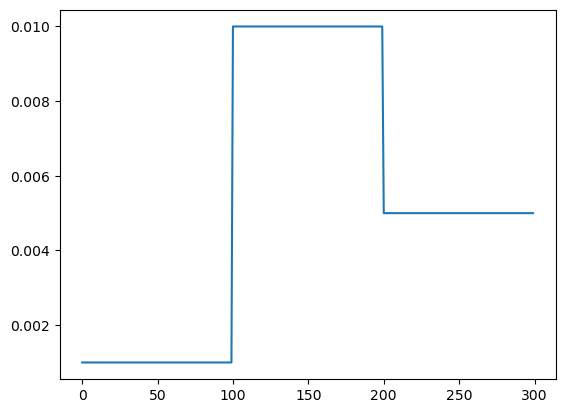

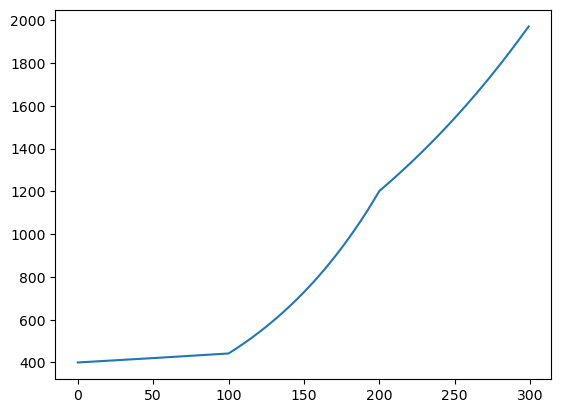

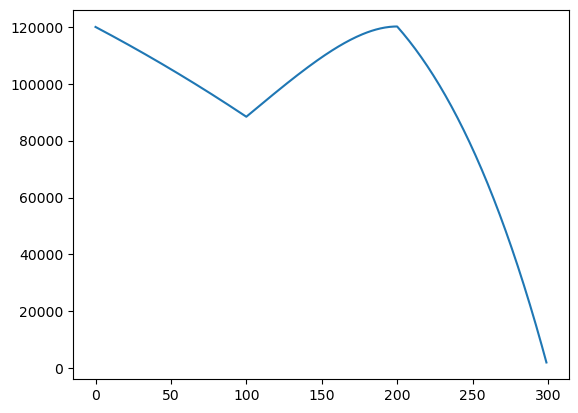

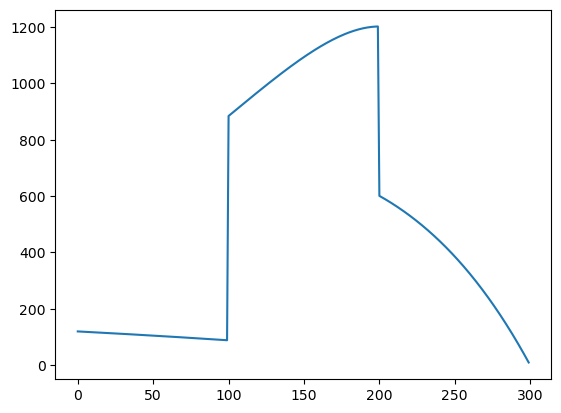

In [128]:
def alpha(t):
    if t < 100: return 0.001
    elif t < 200: return 0.01
    else: return 0.005

B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

variable_fixed_mortgage = VariableRateMortgage(B_0, T, alpha)

a_list = []
r_list = []
B_list = []
interest_added_list = []
for t in range(T):
    a_list.append(alpha(t))
    r_list.append(variable_fixed_mortgage.r(t))
    B_list.append(variable_fixed_mortgage.B(t))
    interest_added_list.append(B_list[t]*alpha(t))

plt.plot(a_list)
plt.figure()
plt.plot(r_list)
plt.figure()
plt.plot(B_list)
plt.figure()
plt.plot(interest_added_list)

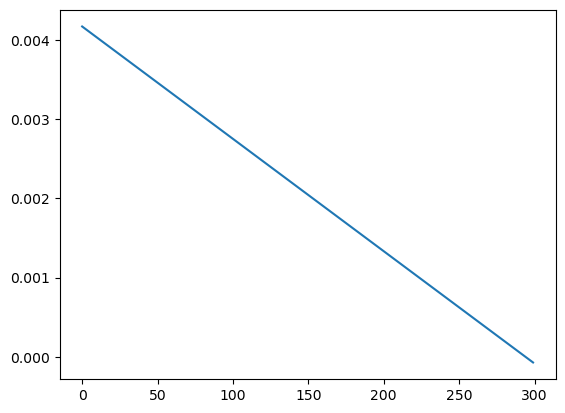

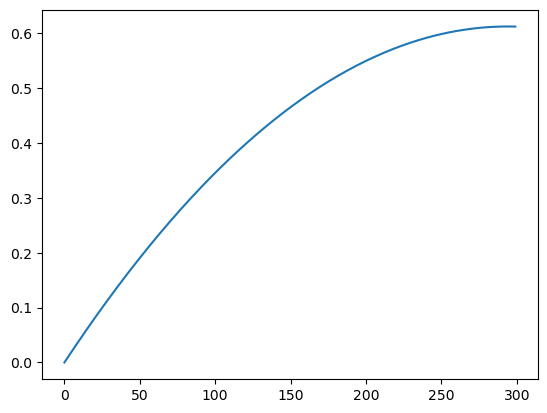

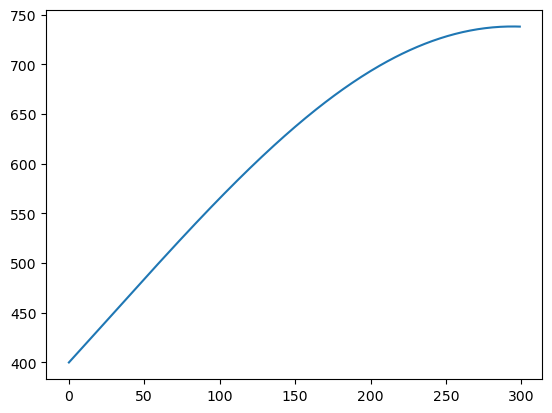

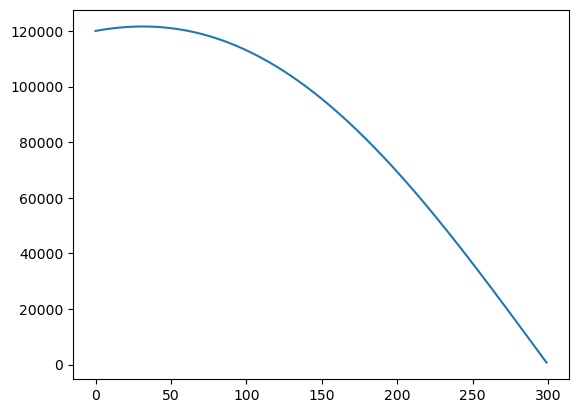

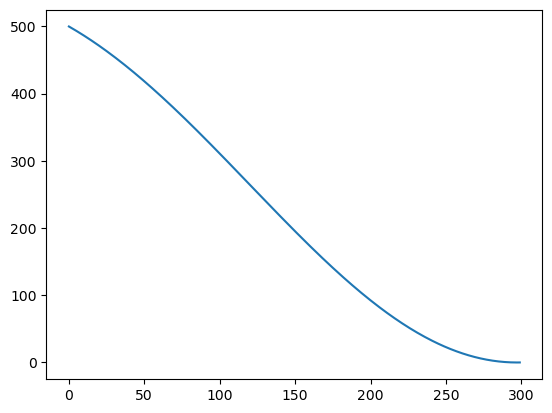

In [127]:
def alpha(t):
    return (0.05 - (0.051/T)*t)/12

B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

variable_decreasing_interest_mortgage = VariableRateMortgage(B_0, T, alpha)

a_list = []
a_int_list = []
r_list = []
B_list = []
interest_added_list = []
for t in range(T):
    a_list.append(alpha(t))
    a_int_list.append(variable_decreasing_interest_mortgage.alpha_integrated(t))
    r_list.append(variable_decreasing_interest_mortgage.r(t))
    B_list.append(variable_decreasing_interest_mortgage.B(t))
    interest_added_list.append(B_list[t]*alpha(t))

plt.plot(a_list)
plt.figure()
plt.plot(a_int_list)
plt.figure()
plt.plot(r_list)
plt.figure()
plt.plot(B_list)
plt.figure()
plt.plot(interest_added_list)

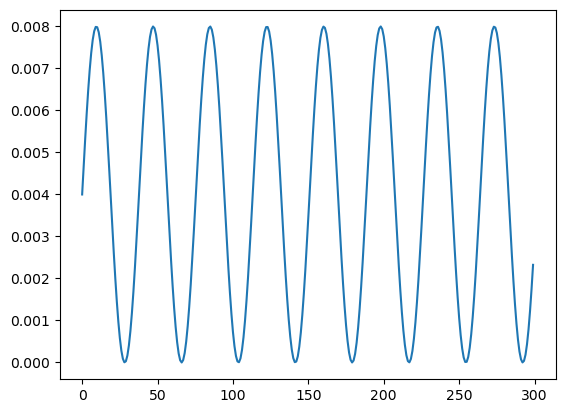

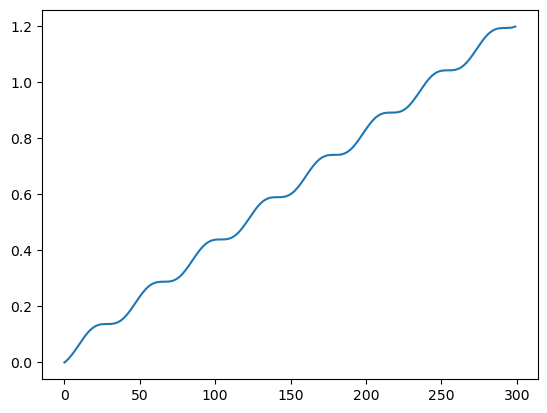

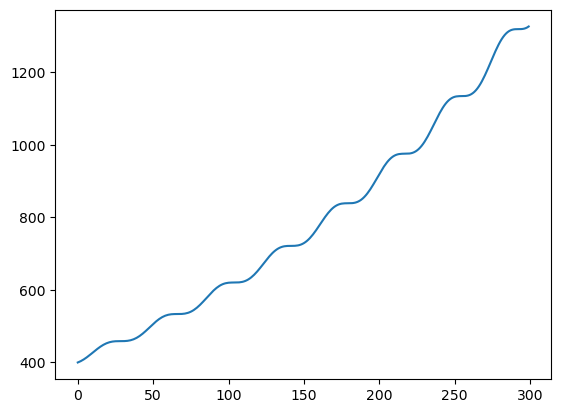

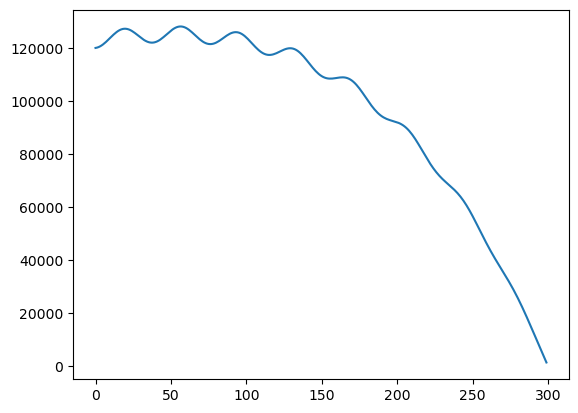

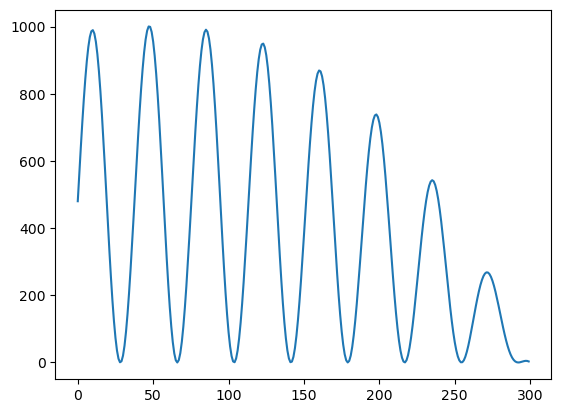

In [126]:
def alpha(t):
    return (1 + np.sin(t/6))/250

B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

variable_decreasing_interest_mortgage = VariableRateMortgage(B_0, T, alpha)

a_list = []
a_int_list = []
r_list = []
B_list = []
interest_added_list = []
for t in range(T):
    a_list.append(alpha(t))
    a_int_list.append(variable_decreasing_interest_mortgage.alpha_integrated(t))
    r_list.append(variable_decreasing_interest_mortgage.r(t))
    B_list.append(variable_decreasing_interest_mortgage.B(t))
    interest_added_list.append(B_list[t]*alpha(t))

plt.plot(a_list)
plt.figure()
plt.plot(a_int_list)
plt.figure()
plt.plot(r_list)
plt.figure()
plt.plot(B_list)
plt.figure()
plt.plot(interest_added_list)

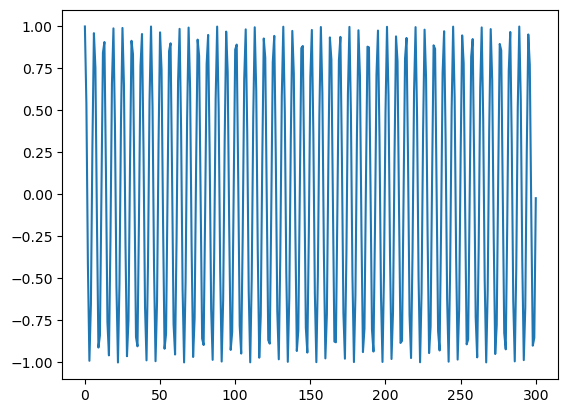

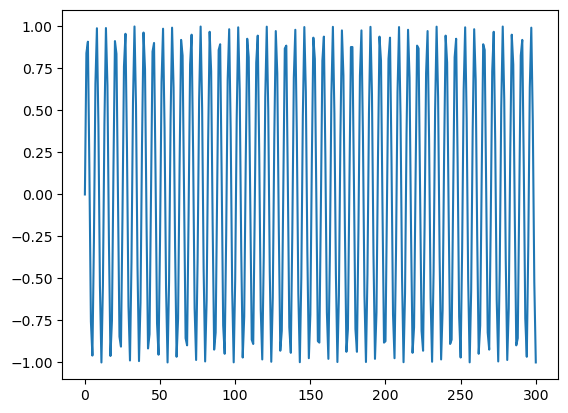

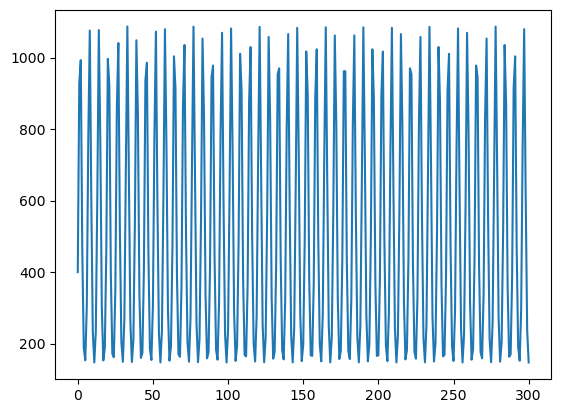

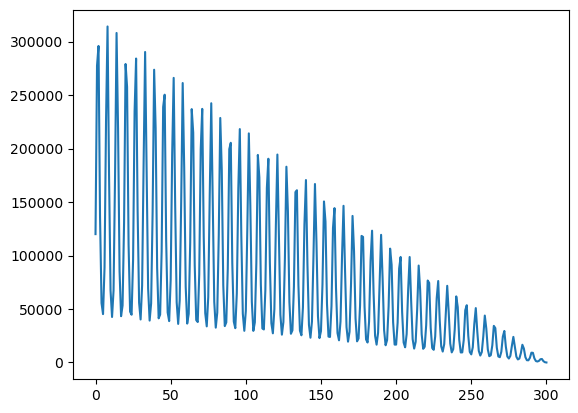

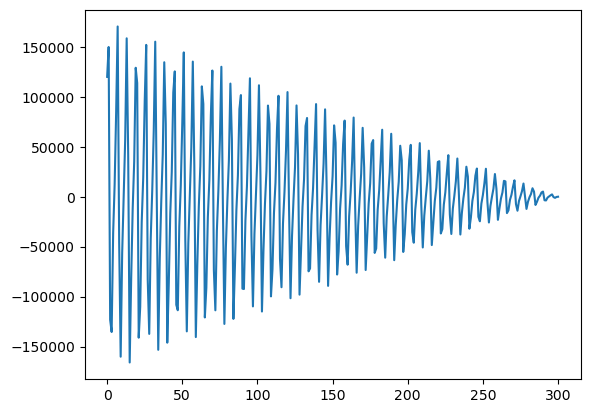

In [135]:
def alpha(t):
    return np.cos(t)

B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

variable_decreasing_interest_mortgage = VariableRateMortgage(B_0, T, alpha)

a_list = []
a_int_list = []
r_list = []
B_list = []
interest_added_list = []
for t in range(T+1):
    a_list.append(alpha(t))
    a_int_list.append(variable_decreasing_interest_mortgage.alpha_integrated(t))
    r_list.append(variable_decreasing_interest_mortgage.r(t))
    B_list.append(variable_decreasing_interest_mortgage.B(t))
    interest_added_list.append(B_list[t]*alpha(t))

plt.plot(a_list)
plt.figure()
plt.plot(a_int_list)
plt.figure()
plt.plot(r_list)
plt.figure()
plt.plot(B_list)
plt.figure()
plt.plot(interest_added_list)

In [136]:
B_list[-1]

0.0

In [123]:
## This was an experiment that gives incorrect results

class VariableRateMortgage2:
    def __init__(self, B_0, T, alpha):
        self.B_0 = B_0
        self.T = T
        self.alpha = alpha

    def alpha_integrated(self, t):
        """Numerically evaluate the function for the interest rate between 0 and given t using scipy.integrate.quad"""
        if t == 0: return 0 # Evaluating between 0 and 0 will give 0 anyway, so avoids dealing with functions that behave badly at 0
        return integrate.quad(self.alpha, 0, t)[0]

    def alpha_integrated_inner(self, t):
        return integrate.quad(self.alpha, self.T-t, t)[0]
        #return 0.5*(0.0005/12)*t**2 - 0.5*(0.0005/12)*(self.T - t)**2
        
    def alpha_integrated_error(self, t):
        """For investigation of the numerical error of the numerical integration of interest rate"""
        if t == 0: return 0 # Evaluating between 0 and 0 will give 0 anyway, so avoids dealing with functions that behave badly at 0
        return integrate.quad(self.alpha, 0, t)[1]

    def r(self, t):
        return (self.B_0 / self.T) * np.exp(self.alpha_integrated(self.T - t))

    def B(self, t):
        return np.exp(self.alpha_integrated(t)) * (self.B_0 - integrate.quad(lambda s: (self.B_0/self.T) * np.exp(-(0.5*(0.0005/12)*s**2 - 0.5*(0.0005/12)*(self.T - s)**2)), 0, t)[0])


In [124]:
alpha = lambda t: 0.0005*t/12 # monthly interest rate
B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

v = VariableRateMortgage2(120000, 300, alpha)
v.B(T)

-546176.3295623958

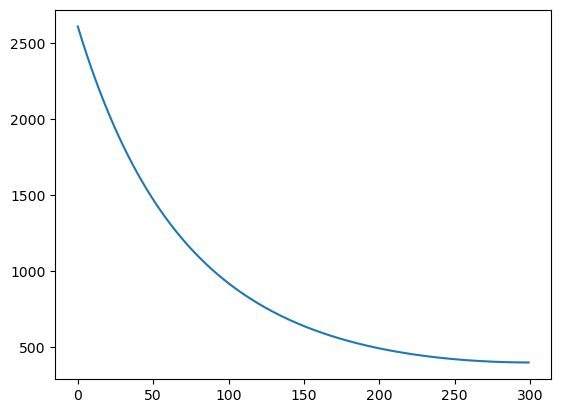

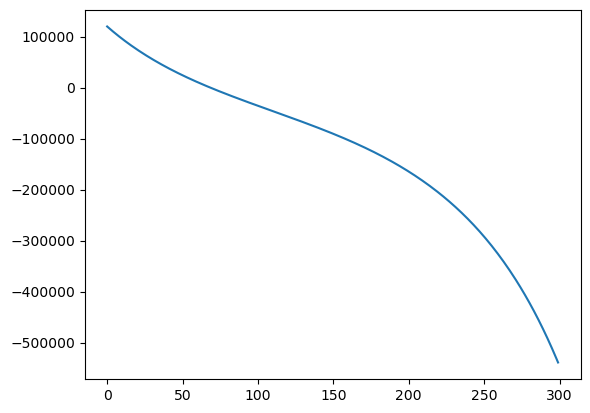

In [125]:
r_list = []
B_list = []
interest_added_list = []
for t in range(T):
    r_list.append(v.r(t))
    B_list.append(v.B(t))

plt.plot(r_list)
plt.figure()
plt.plot(B_list)

In [113]:
sum(r_list)

266820.4174548193